In [36]:
# === Supresión de advertencias ===
import warnings
warnings.filterwarnings('ignore')

# === Manipulación y visualización ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Estadística y modelos ===
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Machine Learning (sklearn) ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# === Configuración de visualización ===
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
!git clone https://github.com/mateocivil10/pj_sa_202501.git

fatal: destination path 'pj_sa_202501' already exists and is not an empty directory.


In [3]:
import pandas as pd
import glob

# Ruta a los archivos parquet dentro del repo clonado
ruta_archivos = 'pj_sa_202501/src/AGUA/*.parquet'

# Cargar todos los archivos en un solo DataFrame
archivos = glob.glob(ruta_archivos)
df = pd.concat([pd.read_parquet(archivo) for archivo in archivos])

# Verificamos columnas cargadas
print(df.columns.tolist())

['AGRUPAGENTE', 'Altitud', 'antigedif', 'antigref', 'ANTIGUEDAD_VIVIENDA', 'anualidad_reemplazo', 'anualidad_seguro', 'AnyoCons_edif', 'AnyoCons_edif_total', 'AUX', 'bloqueo', 'CANAL', 'catage_emp', 'catage_glob', 'catage_hog', 'catage_tur', 'CATTAG', 'cl_cobro', 'codigo_grp', 'CODINE', 'CODPOST', 'CODPROV', 'COMESP', 'CONFCOMELE', 'Contr_Agr_pct', 'Contr_Cons_pct', 'Contr_ConvIndefH_pct', 'Contr_ConvIndefm_pct', 'Contr_Ind_pct', 'Contr_IndefH_pct', 'Contr_IndefM_pct', 'Contr_Serv_pct', 'Contr_TempH_pct', 'Contr_Tempm_pct', 'Contr_tot_pct', 'Conv_AVG', 'CORINE_VARIETY', 'CUPD_CAP_Corr_aguaacagbc', 'CUPD_Exc_aguaacagbc', 'DC', 'densidad_cpost', 'DIAS_PREC_SUP_10MM', 'DIAS_PREC_SUP_1MM', 'DIAS_PREC_SUP_30MM', 'DIAS_VIENT_MAX_60KMH', 'DIAS_VIENT_MAX_70KMH', 'DIAS_VIENT_MAX_80KMH', 'DIAS_VIENT_MED_30KMH', 'DIAS_VIENT_MED_40KMH', 'DIAS_VIENT_MED_50KMH', 'DIST_COAST', 'Duracion_per_calido', 'Duracion_per_seco', 'edadtom', 'Elevation_AVG', 'EMSU_RISK', 'EQ_AVG', 'EQ_RISK', 'ERA5_Daily_avg_u',

In [4]:
print(archivos)

['pj_sa_202501/src/AGUA/part-00003-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet', 'pj_sa_202501/src/AGUA/part-00002-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet', 'pj_sa_202501/src/AGUA/part-00000-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet', 'pj_sa_202501/src/AGUA/part-00001-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet', 'pj_sa_202501/src/AGUA/part-00004-20e0f4c4-2272-4aa2-bbed-9c3ff84c37b8-c000.snappy.parquet']


In [5]:
print(df)

       AGRUPAGENTE  Altitud  antigedif  antigref  ANTIGUEDAD_VIVIENDA  \
0          1025.00   101.00      50.00       NaN                50.00   
1          1025.00   101.00      50.00       NaN                50.00   
2          1026.00   101.00      48.00       NaN                48.00   
3          1026.00   101.00      17.00       NaN                17.00   
4          1025.00   101.00      47.00       NaN                47.00   
...            ...      ...        ...       ...                  ...   
98245      1035.00      NaN      34.00      9.00                 9.00   
98246      1035.00      NaN        NaN       NaN                  NaN   
98247      1035.00      NaN      69.00     15.00                15.00   
98248      1019.00      NaN      52.00      7.00                 7.00   
98249      1019.00      NaN      53.00      8.00                 8.00   

       anualidad_reemplazo  anualidad_seguro  AnyoCons_edif  \
0                    99.00             10.00        1973.00 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path_dict = "/content/data_dict.xlsx"
data_dict = pd.read_excel(path_dict)
data_dict[['Factores', 'LABEL']].dropna().head(10)

,Factores,LABEL
0,AGRUPAGENTE,Agrupacion del agente
1,Altitud,Altitud (m)
2,antigedif,Antiguedad del edificio
3,antigref,Antiguedad de la reforma
4,ANTIGUEDAD_VIVIENDA,Antiguedad de la vivienda (new)
5,anualidad_reemplazo,Anualidad del remplazo
6,anualidad_seguro,Anualidad del Seguro
7,AnyoCons_edif,Año_Const_Med_Edif_Rcp
8,AnyoCons_edif_total,Año const. Medio Total Edificio CP
9,AUX,Indicador para muestra aleatoria


In [8]:
df = df[df['exp_corr_ACAGBC']>0]
df['resp'] = df['stro_Corr_AGUAACAGBC']/df['exp_corr_ACAGBC']
df

,AGRUPAGENTE,Altitud,antigedif,antigref,ANTIGUEDAD_VIVIENDA,anualidad_reemplazo,anualidad_seguro,AnyoCons_edif,AnyoCons_edif_total,AUX,bloqueo,CANAL,catage_emp,catage_glob,catage_hog,catage_tur,CATTAG,cl_cobro,codigo_grp,CODINE,CODPOST,CODPROV,COMESP,CONFCOMELE,Contr_Agr_pct,Contr_Cons_pct,Contr_ConvIndefH_pct,Contr_ConvIndefm_pct,Contr_Ind_pct,Contr_IndefH_pct,Contr_IndefM_pct,Contr_Serv_pct,Contr_TempH_pct,Contr_Tempm_pct,Contr_tot_pct,Conv_AVG,CORINE_VARIETY,CUPD_CAP_Corr_aguaacagbc,CUPD_Exc_aguaacagbc,DC,densidad_cpost,DIAS_PREC_SUP_10MM,DIAS_PREC_SUP_1MM,DIAS_PREC_SUP_30MM,DIAS_VIENT_MAX_60KMH,DIAS_VIENT_MAX_70KMH,DIAS_VIENT_MAX_80KMH,DIAS_VIENT_MED_30KMH,DIAS_VIENT_MED_40KMH,DIAS_VIENT_MED_50KMH,DIST_COAST,Duracion_per_calido,Duracion_per_seco,edadtom,Elevation_AVG,EMSU_RISK,EQ_AVG,EQ_RISK,ERA5_Daily_avg_u,Etiq_AGUAACAGBC,ETP_anual,EU_IMP_IBU_100m,EU_IMP_IBU_10m,EU_IMP_IMD_100m,EU_IMP_IMD_10m,EU_LC_L1,EU_LC_L2,EU_TOPO_ASP_D4,EU_TOPO_ASP_D8,EU_TOPO_CONV,EU_TOPO_DIST_COAST,EU_TOPO_ELE,EU_TOPO_HAND,EU_TOPO_SLO,EU_VEG_FTY_100m,EU_VEG_FTY_10m,EU_VEG_TCD_100m,EU_VEG_TCD_10m,exp_corr_ACAGBC,EXPOSICION,extension,Factor_R,FI_RISK,Flood_AVG,FLRF_RISK,FLSW_RISK,FP,GMSeguros_indice_med,HA_RISK,HABITANTES,Hail_AVG,IMP_GMIS,Imperv_AVG,Ind_Turc_Regadio,Ind_Turc_Secano,K_ACAGBC,Landslide_AVG,LC_100m,LC_10m,MediadorLMI,mediaEdad,NIF_TIPO,NP_RB,nse,num_declaraciones,num_habitantes,p_africa,p_agpA,p_agpB,p_ALEM,p_americana,p_arabian,P_ARABIAN_VS_TOT,p_consF,p_cpers,p_dpers,p_east_EUR,P_EAST_EUR_VS_TOT,p_espa,p_extra,P_EXTRA_RESTO,p_induC,p_induD,p_induE,p_mcpers,p_p0004,p_p0019,p_p0509,p_p100M,p_p1014,p_p1519,p_p2024,p_p2039,p_p2529,p_p3034,p_p3539,p_p4044,p_p4064,p_p4549,p_p5054,p_p5559,p_p6064,p_p6569,p_p65M,p_p7074,p_p7579,p_p8084,p_p8589,p_p9094,p_p9599,p_portales_A,p_portales_B,p_portales_C,p_portales_D,p_portales_E,p_portales_F,p_portales_NA,p_servG,p_servH,p_servI,p_servJ,p_servK,p_servL,p_servM,p_servN,p_servO,p_servP,p_servQ,P_SUDAMER_VS_TOT,p_tpers,p_UE27,p_upers,p_WEST_EUR,P_WEST_EUR_VS_TOT,PACRAS,Paro_0024_pct,Paro_2544_pct,Paro_Agr_pct,Paro_Cons_pct,Paro_Dese_pct,Paro_Ind_pct,Paro_tot_pct,PCT_CLIENTE_AP,PCT_DTO_COMERCIAL,PCT_DTO_COMISION_AGENTE,PCT_DTO_TRASPASO,pct1524Tot,pct2544Tot,pctActTot,pctJovenTot,pctJubiladoTot,pctM45Tot,Pluviometria_anual,pob_1524Tot,pob_2544Tot,pob_actTot,pob_JovenTot,pob_JubiladoTot,pob_M45Tot,pob_Total,POL_ACCIDENTES,POL_AHORRO,POL_AUTOS,POL_COL_AHORRO,POL_COL_PENSIONES,POL_COL_RIESGO,POL_COMERCIO,POL_COMUNIDADES,POL_EMPRESAS,POL_FLOTAS,POL_HOGAR,POL_IND_AHORRO,POL_IND_FINANCIERO,POL_IND_PENSIONES,POL_IND_RIESGO,POL_MOTOS,POL_NO_VIDA,POL_NOAUTOS,POL_PATRIMONIALES,POL_PENSIONES,POL_RIESGO,POL_SALUD,POL_TOTAL,POL_TURISMOS,POL_VEH_COMERCIAL,POL_VIDA,POLAGE_ACCIDENTES,POLAGE_AUTOS,POLAGE_COMERCIO,POLAGE_COMUNIDADES,POLAGE_FLOTAS,POLAGE_HOGAR,POLAGE_MOTOS,POLAGE_NO_VIDA,POLAGE_NOAUTOS,POLAGE_TURISMOS,POLAGE_VEH_COMERCIAL,POP_GHS2015,POP_GPW2020,Population_AVG,PREC_E_OBS_100Y,PREC_E_OBS_10Y,PREC_E_OBS_25Y,PREC_E_OBS_50Y,PREC_E_OBS_5Y,PREC_ECAD_100Y,PREC_ECAD_10Y,PREC_ECAD_25Y,PREC_ECAD_50Y,PREC_ECAD_5Y,PREC_ERA5_100Y,PREC_ERA5_10Y,PREC_ERA5_25Y,PREC_ERA5_50Y,PREC_ERA5_5Y,PROPIETARIO,RAMO,ratDecl_Conjuntas,ratDecl_xHab,ratTitulares_xHab,renta_bruta,renta_bruta_media,renta_disponible,ROBINSON,SC_RISK,Slope_AVG,stro_1a_AGUAACAGBC,stro_2a_AGUAACAGBC,stro_3a_AGUAACAGBC,stro_4a_AGUAACAGBC,stro_5a_AGUAACAGBC,stro_Corr_AGUAACAGBC,Stro_G_aguaacagbc,SUPERFICIE,TAG,TC_RISK,TEMP_MAX_10Y,TEMP_MAX_30Y,TEMP_MAX_50Y,TEMP_MIN_10Y,TEMP_MIN_30Y,TEMP_MIN_50Y,Temperatura_med_anual,Temperatura_med_max_mes_calido,Temperatura_med_min_mes_frio,tipoImpositivoMedio,titulares,Tornado_AVG,tot_pob,Tree_cover_AVG,VEG_TCD,VIGILANCIA,Wind_AVG,WIND_GUST_10Y,WIND_GUST_30Y,WIND_GUST_50Y,WIND_MAX_10Y,WIND_MAX_30Y,WIND_MAX_50Y,WIND_MEAN_10Y,WIND_MEAN_30Y,WIND_MEAN_50Y,WS_RISK,year,aeropuertos,agricultural_mainland,agua,altura_mea,altura_std,arrozales,Arsenico_invier,Arsenico_otono,Arsenico_primav,Arsenico_verano,Benzo_invier,Benzo_otono,Benz

In [9]:
# Variables_filtradas 54
var_filtrar = [
    'Altitud',
    'antigedif',
    'antigref',
    'ANTIGUEDAD_VIVIENDA',
    'anualidad_reemplazo',
    'anualidad_seguro',
    'AnyoCons_edif',
    'CODPROV',
    'CUPD_CAP_Corr_aguaacagbc',
    'CUPD_Exc_aguaacagbc',
    'DIAS_PREC_SUP_10MM',
    'DIAS_PREC_SUP_1MM',
    'DIAS_PREC_SUP_30MM',
    'DIAS_VIENT_MAX_60KMH',
    'DIAS_VIENT_MAX_70KMH',
    'DIAS_VIENT_MAX_80KMH',
    'DIAS_VIENT_MED_30KMH',
    'DIAS_VIENT_MED_40KMH',
    'DIAS_VIENT_MED_50KMH',
    'Duracion_per_calido',
    'Duracion_per_seco',
    'edadtom',
    'Elevation_AVG',
    'EQ_AVG',
    'Etiq_AGUAACAGBC',
    'HABITANTES',
    'K_ACAGBC',
    'NIF_TIPO',
    'nse',
    'num_habitantes',
    'POL_HOGAR',
    'POL_NO_VIDA',
    'POL_PATRIMONIALES',
    'POL_PENSIONES',
    'POL_RIESGO',
    'POL_TOTAL',
    'renta_bruta',
    'renta_bruta_media',
    'stro_1a_AGUAACAGBC',
    'stro_2a_AGUAACAGBC',
    'stro_3a_AGUAACAGBC',
    'stro_4a_AGUAACAGBC',
    'stro_5a_AGUAACAGBC',
    'Stro_G_aguaacagbc',
    'SUPERFICIE',
    'Temperatura_med_anual',
    'Temperatura_med_max_mes_calido',
    'Temperatura_med_min_mes_frio',
    'Tornado_AVG',
    'tot_pob',
    'year',
    'resp',
    'stro_Corr_AGUAACAGBC',
    'exp_corr_ACAGBC'
]

In [10]:
df_filtrado = df[var_filtrar]
df_filtrado

,Altitud,antigedif,antigref,ANTIGUEDAD_VIVIENDA,anualidad_reemplazo,anualidad_seguro,AnyoCons_edif,CODPROV,CUPD_CAP_Corr_aguaacagbc,CUPD_Exc_aguaacagbc,DIAS_PREC_SUP_10MM,DIAS_PREC_SUP_1MM,DIAS_PREC_SUP_30MM,DIAS_VIENT_MAX_60KMH,DIAS_VIENT_MAX_70KMH,DIAS_VIENT_MAX_80KMH,DIAS_VIENT_MED_30KMH,DIAS_VIENT_MED_40KMH,DIAS_VIENT_MED_50KMH,Duracion_per_calido,Duracion_per_seco,edadtom,Elevation_AVG,EQ_AVG,Etiq_AGUAACAGBC,HABITANTES,K_ACAGBC,NIF_TIPO,nse,num_habitantes,POL_HOGAR,POL_NO_VIDA,POL_PATRIMONIALES,POL_PENSIONES,POL_RIESGO,POL_TOTAL,renta_bruta,renta_bruta_media,stro_1a_AGUAACAGBC,stro_2a_AGUAACAGBC,stro_3a_AGUAACAGBC,stro_4a_AGUAACAGBC,stro_5a_AGUAACAGBC,Stro_G_aguaacagbc,SUPERFICIE,Temperatura_med_anual,Temperatura_med_max_mes_calido,Temperatura_med_min_mes_frio,Tornado_AVG,tot_pob,year,resp,stro_Corr_AGUAACAGBC,exp_corr_ACAGBC
0,101.00,50.00,NaN,50.00,99.00,10.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,109092.58,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,1.00,1.00,2.00,2.00,5.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2023.00,0.00,0.00,0.77
1,101.00,50.00,NaN,50.00,99.00,10.00,1973.00,8.00,53.55,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,109092.58,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,1.00,1.00,2.00,2.00,5.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2023.00,7.02,1.00,0.14
4,101.00,47.00,NaN,47.00,99.00,1.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,16000.00,J,3.83,446332.00,-999.00,1.00,1.00,0.00,0.00,-999.00,5571584634.00,12492.01,-999.00,-999.00,-999.00,-999.00,-999.00,0,265.00,15.30,27.90,4.50,2.00,50718.00,2021.00,0.00,0.00,0.64
5,101.00,49.00,NaN,49.00,99.00,9.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,103503.40,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,0.00,1.00,1.00,4.00,4.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2022.00,0.00,0.00,0.92
6,101.00,50.00,NaN,50.00,99.00,10.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,109092.58,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,1.00,1.00,2.00,2.00,5.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2022.00,0.00,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98234,NaN,78.00,22.00,22.00,99.00,6.00,1972.00,52.00,0.00,0.00,15.00,56.60,3.00,52.00,23.40,9.00,8.00,0.00,0.00,NaN,NaN,NaN,17.98,3.08,Valores coherentes,60.00,18858.43,J,3.79,174152.00,0.00,4.00,4.00,0.00,0.00,4.00,1932105250.00,11199.18,0.00,0.00,0.00,0.00,0.00,0,328.00,NaN,NaN,NaN,2.00,23457.00,2021.00,0.00,0.00,0.50
98242,NaN,84.00,NaN,84.00,1.00,34.00,1972.00,52.00,0.00,0.00,15.00,56.60,3.00,52.00,23.40,9.00,8.00,0.00,0.00,NaN,NaN,88.00,17.98,3.08,Valores coherentes,60.00,20000.00,N,3.79,174152.00,0.00,1.00,1.00,0.00,0.00,1.00,1932105250.00,11094.36,0.00,0.00,0.00,0.00,0.00,0,300.00,NaN,NaN,NaN,2.00,23457.00,2020.00,0.00,0.00,0.06
98243,NaN,79.00,23.00,23.00,99.00,7.00,1972.00,52.00,0.00,0.00,15.00,56.60,3.00,52.00,23.40,9.00,8.00,0.00,0.00,NaN,NaN,NaN,17.98,3.08,Valores coherentes,60.00,19876.79,J,3.79,174152.00,0.00,3.00,3.00,0.00,0.00,3.00,1932105250.00,11342.64,0.00,0.00,0.00,0.00,0.00,0,328.00,NaN,NaN,NaN,2.00,23457.00,2023.00,0.00,0.00,0.50
98244,NaN,80.00,24.00,24.00,99.00,8.00,1972.00,52.00,0.00,0.00,15.00,56.60,3.00,52.00,23.40,9.00,8.00,0.00,0.00,NaN,NaN,NaN,17.98,3.08,Valores coherentes,60.00,21327.80,J,3.79,174152.00,0.00,3.00,3.00,0.00,0.00,3.00,1932105250.00,11342.64,1.00,1.00,1.00,1.00,1.00,0,328.00,NaN,NaN,NaN,2.00,23457.00,2023.00,0.00,0.00,0

In [11]:
def limpiar_datos(df_filtrado, variable_respuesta='resp', variable_peso='exp_corr_ACAGBC', verbose=True):
    original_shape = df_filtrado.shape

    # 1. Quitar duplicados
    df_filtrado = df_filtrado.drop_duplicates()
    if verbose: print(f"→ Eliminados duplicados. Nuevas dimensiones: {df_filtrado.shape}")

    # 2. Eliminar observaciones con valor 0 en el denominador
    df_filtrado = df_filtrado[df_filtrado[variable_peso] > 0]
    df_filtrado[variable_respuesta] = df_filtrado['stro_Corr_AGUAACAGBC'] / df_filtrado[variable_peso]
    if verbose: print(f"→ Eliminadas filas con {variable_peso} = 0. Dimensiones: {df_filtrado.shape}")

    # 3. Truncar outliers extremos del 99 percentil
    p99 = df_filtrado[variable_respuesta].quantile(0.99)
    df_filtrado = df_filtrado[df_filtrado[variable_respuesta] < p99]
    if verbose: print(f"→ Filtrado outliers en {variable_respuesta}. P99 = {p99:.2f}. Dimensiones: {df_filtrado.shape}")

    # 4. Convertir columnas categóricas
    df_filtrado['year'] = df_filtrado['year'].astype('object')
    for col in df_filtrado.select_dtypes(include=['object', 'category']).columns:
        df_filtrado[col] = df_filtrado[col].astype('category')
    if verbose: print(f"→ Convertidas variables categóricas: {df_filtrado.select_dtypes('category').columns.tolist()}")

    # 5. Crear dummies
    df_filtrado_dummies = pd.get_dummies(df_filtrado, drop_first=True)
    if verbose: print(f"→ Dummies creadas. Total columnas: {df_filtrado_dummies.shape[1]}")

    # 6. Eliminar columnas con >80% nulos
    null_ratio = df_filtrado_dummies.isnull().mean()
    cols_drop = null_ratio[null_ratio > 0.8].index.tolist()
    df_filtrado_dummies.drop(columns=cols_drop, inplace=True)
    if verbose and cols_drop:
        print(f"→ Columnas con >80% nulos eliminadas: {cols_drop}")

    # 7. Eliminar filas con nulos remanentes
    df_filtrado_dummies.dropna(inplace=True)
    if verbose: print(f"→ Filas con nulos eliminadas. Final shape: {df_filtrado_dummies.shape}")

    # 8. Análisis de correlación
    plt.figure(figsize=(10,6))
    sns.heatmap(df_filtrado_dummies.corr(numeric_only=True)[[variable_respuesta]].sort_values(variable_respuesta, ascending=False), annot=True)
    plt.title("Correlación con la variable respuesta")
    plt.show()

    # 9. Cálculo de VIF
    X = df_filtrado_dummies.drop(columns=[variable_respuesta])
    vif_data = pd.DataFrame()
    vif_data['variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data.sort_values(by='VIF', ascending=False, inplace=True)
    if verbose:
        print("\n→ Top variables con multicolinealidad (VIF alto):")
        print(vif_data.head(10))

    return df_filtrado_dummies, vif_data


In [12]:
df_filtrado.head(10)

,Altitud,antigedif,antigref,ANTIGUEDAD_VIVIENDA,anualidad_reemplazo,anualidad_seguro,AnyoCons_edif,CODPROV,CUPD_CAP_Corr_aguaacagbc,CUPD_Exc_aguaacagbc,DIAS_PREC_SUP_10MM,DIAS_PREC_SUP_1MM,DIAS_PREC_SUP_30MM,DIAS_VIENT_MAX_60KMH,DIAS_VIENT_MAX_70KMH,DIAS_VIENT_MAX_80KMH,DIAS_VIENT_MED_30KMH,DIAS_VIENT_MED_40KMH,DIAS_VIENT_MED_50KMH,Duracion_per_calido,Duracion_per_seco,edadtom,Elevation_AVG,EQ_AVG,Etiq_AGUAACAGBC,HABITANTES,K_ACAGBC,NIF_TIPO,nse,num_habitantes,POL_HOGAR,POL_NO_VIDA,POL_PATRIMONIALES,POL_PENSIONES,POL_RIESGO,POL_TOTAL,renta_bruta,renta_bruta_media,stro_1a_AGUAACAGBC,stro_2a_AGUAACAGBC,stro_3a_AGUAACAGBC,stro_4a_AGUAACAGBC,stro_5a_AGUAACAGBC,Stro_G_aguaacagbc,SUPERFICIE,Temperatura_med_anual,Temperatura_med_max_mes_calido,Temperatura_med_min_mes_frio,Tornado_AVG,tot_pob,year,resp,stro_Corr_AGUAACAGBC,exp_corr_ACAGBC
0,101.00,50.00,NaN,50.00,99.00,10.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,109092.58,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,1.00,1.00,2.00,2.00,5.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2023.00,0.00,0.00,0.77
1,101.00,50.00,NaN,50.00,99.00,10.00,1973.00,8.00,53.55,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,109092.58,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,1.00,1.00,2.00,2.00,5.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2023.00,7.02,1.00,0.14
4,101.00,47.00,NaN,47.00,99.00,1.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,16000.00,J,3.83,446332.00,-999.00,1.00,1.00,0.00,0.00,-999.00,5571584634.00,12492.01,-999.00,-999.00,-999.00,-999.00,-999.00,0,265.00,15.30,27.90,4.50,2.00,50718.00,2021.00,0.00,0.00,0.64
5,101.00,49.00,NaN,49.00,99.00,9.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,103503.40,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,0.00,1.00,1.00,4.00,4.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2022.00,0.00,0.00,0.92
6,101.00,50.00,NaN,50.00,99.00,10.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,109092.58,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,1.00,1.00,2.00,2.00,5.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2022.00,0.00,0.00,0.08
9,101.00,47.00,NaN,47.00,99.00,1.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,16000.00,J,3.83,446332.00,-999.00,1.00,1.00,0.00,0.00,-999.00,5571584634.00,12464.06,-999.00,-999.00,-999.00,-999.00,-999.00,0,265.00,15.30,27.90,4.50,2.00,50718.00,2022.00,0.00,0.00,0.33
10,101.00,48.00,NaN,48.00,99.00,2.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,16864.00,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12464.06,0.00,0.00,0.00,0.00,0.00,0,265.00,15.30,27.90,4.50,2.00,50718.00,2022.00,0.00,0.00,0.67
11,101.00,49.00,NaN,49.00,99.00,9.00,1973.00,8.00,1536.88,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,103503.40,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12492.01,0.00,1.00,1.00,4.00,4.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2021.00,11.77,1.00,0.08
12,101.00,48.00,NaN,48.00,99.00,8.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,103503.40,J,3.83,446332.00,0.00,1.00,1.00,0.00,0.00,1.00,5571584634.00,12492.01,1.00,1.00,4.00,4.00,6.00,0,2600.00,15.30,27.90,4.50,2.00,50718.00,2021.00,0.00,0.00,0.54
13,101.00,48.00,NaN,48.00,99.00,8.00,1973.00,8.00,0.00,0.00,24.80,69.80,5.80,8.70,3.00,1.00,2.00,0.00,0.00,0.00,2.74,NaN,62.41,2.00,Valores coherentes,225.00,103503.40,J,3.83,4

In [13]:
#Ver mediana, std, min, max y percentiles
df_filtrado.describe()

,Altitud,antigedif,antigref,ANTIGUEDAD_VIVIENDA,anualidad_reemplazo,anualidad_seguro,AnyoCons_edif,CODPROV,CUPD_CAP_Corr_aguaacagbc,CUPD_Exc_aguaacagbc,DIAS_PREC_SUP_10MM,DIAS_PREC_SUP_1MM,DIAS_PREC_SUP_30MM,DIAS_VIENT_MAX_60KMH,DIAS_VIENT_MAX_70KMH,DIAS_VIENT_MAX_80KMH,DIAS_VIENT_MED_30KMH,DIAS_VIENT_MED_40KMH,DIAS_VIENT_MED_50KMH,Duracion_per_calido,Duracion_per_seco,edadtom,Elevation_AVG,EQ_AVG,HABITANTES,K_ACAGBC,nse,num_habitantes,POL_HOGAR,POL_NO_VIDA,POL_PATRIMONIALES,POL_PENSIONES,POL_RIESGO,POL_TOTAL,renta_bruta,renta_bruta_media,stro_1a_AGUAACAGBC,stro_2a_AGUAACAGBC,stro_3a_AGUAACAGBC,stro_4a_AGUAACAGBC,stro_5a_AGUAACAGBC,Stro_G_aguaacagbc,SUPERFICIE,Temperatura_med_anual,Temperatura_med_max_mes_calido,Temperatura_med_min_mes_frio,Tornado_AVG,tot_pob,year,resp,stro_Corr_AGUAACAGBC,exp_corr_ACAGBC
count,535799.00,542164.00,88542.00,542164.00,542164.00,542164.00,536327.00,541878.00,542164.00,542164.00,541658.00,541658.00,541658.00,541658.00,541658.00,541658.00,541658.00,541658.00,541658.00,535799.00,535799.00,27092.00,532740.00,532740.00,542164.00,542164.00,536729.00,536729.00,542164.00,542164.00,542164.00,542164.00,542164.00,542164.00,536729.00,536729.00,542164.00,542164.00,542164.00,542164.00,542164.00,542164.00,542164.00,535799.00,535799.00,535799.00,532740.00,536327.00,542164.00,542164.00,542164.00,542164.00
mean,383.65,41.39,14.44,34.18,87.41,5.55,1968.49,24.87,123.66,13.11,22.32,79.57,3.10,20.35,8.49,3.37,2.48,0.00,0.00,0.95,3.62,66.62,343.90,1.65,488.56,85613.93,3.69,2570924.49,-132.72,1.21,1.17,0.00,0.00,-131.77,53043542898.39,14207.01,-131.65,-131.26,-131.02,-130.99,-131.10,0.01,3270.05,14.95,30.32,3.19,1.32,30032.78,2021.44,7.07,0.28,0.39
std,308.48,21.34,8.72,20.13,31.02,4.66,12.27,14.27,361.60,305.66,13.55,34.42,2.91,11.82,6.40,3.43,5.17,0.05,0.05,1.02,1.49,14.78,319.16,0.89,965.26,85996.38,0.66,5431636.62,339.24,1.85,1.65,0.03,0.12,339.62,118456621707.18,4418.79,339.67,339.83,339.93,339.96,339.92,0.09,27804.10,2.12,3.31,2.93,0.58,24568.24,1.11,38.64,0.45,0.29
min,4.00,0.00,0.00,0.00,0.00,0.00,1904.00,1.00,0.00,0.00,0.00,0.00,0.00,5.70,2.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,-1.24,1.00,0.00,0.00,1.79,76.00,-999.00,1.00,1.00,0.00,0.00,-999.00,519192.15,5237.20,-999.00,-999.00,-999.00,-999.00,-999.00,0.00,0.00,4.40,18.10,-7.10,0.00,5.00,2020.00,0.00,0.00,0.00
25%,110.00,24.00,9.00,17.00,99.00,2.00,1963.00,11.00,0.00,0.00,15.80,65.80,1.00,12.00,4.00,1.00,0.00,0.00,0.00,0.00,2.90,56.00,50.70,1.00,9.00,33169.51,3.36,26742.00,0.00,1.00,1.00,0.00,0.00,1.00,310974876.00,11119.46,0.00,0.00,0.00,0.00,0.00,0.00,798.00,13.80,28.90,0.50,1.00,11327.00,2020.00,0.00,0.00,0.14
50%,269.00,43.00,13.00,32.00,99.00,4.00,1970.00,28.00,0.00,0.00,19.00,76.80,2.00,15.70,5.70,2.00,0.70,0.00,0.00,1.00,3.89,67.00,211.89,1.00,60.00,56547.10,3.74,96255.00,0.00,1.00,1.00,0.00,0.00,1.00,1417049520.00,13732.46,0.00,0.00,0.00,0.00,0.00,0.00,1422.00,14.50,30.50,3.20,1.00,23797.00,2021.00,0.00,0.00,0.33
75%,659.00,53.00,19.00,49.00,99.00,7.00,1976.00,36.00,51.36,0.00,26.00,86.80,4.80,25.00,10.70,4.00,3.00,0.00,0.00,2.00,4.09,77.00,643.87,2.14,280.00,105705.60,4.04,1032381.00,0.00,1.00,1.00,0.00,0.00,1.00,15206163465.00,15945.49,1.00,2.00,2.00,2.00,1.00,0.00,2864.00,16.80,32.30,5.60,2.00,40649.00,2022.00,1.33,1.00,0.61
max,2326.00,123.00,83.00,123.00,99.00,56.00,2006.00,89.00,2500.00,70047.35,89.20,168.60,21.80,85.80,49.00,25.00,82.70,2.00,2.00,4.00,9.51,322.00,2366.22,4.96,3058.00,1737165.93,6.53,16673650.00,104.00,115.00,111.00,2.00,20.00,116.00,363549080400.00,43075.74,67.00,72.00,100.00,123.00,158.00,1.00,8153076.00,19.50,38.80,13.40,3.00,132771.00,2023.00,366.00,1.00,1.00


In [14]:
# CorrLineal variables Resp. Quitar varresp  y columnas categóricas
X = df_filtrado.drop(columns=['resp', 'stro_Corr_AGUAACAGBC','exp_corr_ACAGBC', 'Etiq_AGUAACAGBC', 'year', 'CODPROV', 'NIF_TIPO']) # Excluir columnas categóricas

correlation = X.corrwith(df_filtrado["resp"], method='pearson')
correlation.abs().sort_values(ascending=False).head(10)

,0
K_ACAGBC,0.17
CUPD_CAP_Corr_aguaacagbc,0.16
Stro_G_aguaacagbc,0.04
renta_bruta_media,0.04
SUPERFICIE,0.04
HABITANTES,0.03
num_habitantes,0.03
renta_bruta,0.03
nse,0.03
Temperatura_med_max_mes_calido,0.03


In [15]:
# Reemplazar los valores -999
columnas_a_reemplazar = ['POL_HOGAR', 'POL_TOTAL', 'stro_1a_AGUAACAGBC', 'stro_2a_AGUAACAGBC', 'stro_3a_AGUAACAGBC',
                        'stro_4a_AGUAACAGBC', 'stro_5a_AGUAACAGBC',]

for col in columnas_a_reemplazar:
    mediana = df_filtrado[col][df_filtrado[col] != -999].median()
    df_filtrado[col] = df_filtrado[col].replace(-999, mediana)

In [16]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542164 entries, 0 to 98245
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Altitud                         535799 non-null  float64
 1   antigedif                       542164 non-null  float64
 2   antigref                        88542 non-null   float64
 3   ANTIGUEDAD_VIVIENDA             542164 non-null  float64
 4   anualidad_reemplazo             542164 non-null  float64
 5   anualidad_seguro                542164 non-null  float64
 6   AnyoCons_edif                   536327 non-null  float64
 7   CODPROV                         541878 non-null  float64
 8   CUPD_CAP_Corr_aguaacagbc        542164 non-null  float64
 9   CUPD_Exc_aguaacagbc             542164 non-null  float64
 10  DIAS_PREC_SUP_10MM              541658 non-null  float64
 11  DIAS_PREC_SUP_1MM               541658 non-null  float64
 12  DIAS_PREC_SUP_30MM    

In [19]:
#POISSON
#VARIABLES DEL MODELO
respuesta = 'resp'
peso = 'exp_corr_ACAGBC'

# Lista de variables predictoras necesarias (ajusta si lo deseas)
# Corrected typo: 'stro_la_AGUAACAGBC' to 'stro_1a_AGUAACAGBC'
predictoras = [
    'Altitud',
    'antigedif',
    'antigref',
    'ANTIGUEDAD_VIVIENDA',
    'anualidad_reemplazo',
    'anualidad_seguro',
    'stro_1a_AGUAACAGBC',  # Corrected typo
    'CUPD_CAP_Corr_aguaacagbc',
    # 'Flood_AVG',           # Removed, as it is not in the dataframe
    # 'PREC_ERAS_10Y'       # Removed, as it is not in the dataframe
]

# FILTRADO DE VARIABLES
columnas_utiles = [respuesta, peso] + predictoras
df_modelo = df_filtrado[columnas_utiles].copy()

#Eliminar registros con valores nulos en cualquiera de esas columnas
df_modelo = df_modelo.dropna()

# CONVERSIÓN A NUMÉRICO (por si acaso)
df_modelo = df_modelo.apply(pd.to_numeric, errors='coerce')
df_modelo = df_modelo.dropna()

# Separar variables
X = sm.add_constant(df_modelo[predictoras])
y = df_modelo[respuesta]
offset = np.log(df_modelo[peso])

# AJUSTE DEL MODELO
modelo = sm.GLM(y, X, family=sm.families.Poisson(), offset=offset)
resultado = modelo.fit()

# RESULTADOS
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   resp   No. Observations:                87862
Model:                            GLM   Df Residuals:                    87854
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8052e+06
Date:                Sun, 13 Apr 2025   Deviance:                   7.5133e+06
Time:                        15:40:37   Pearson chi2:                 1.84e+09
No. Iterations:                    13   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

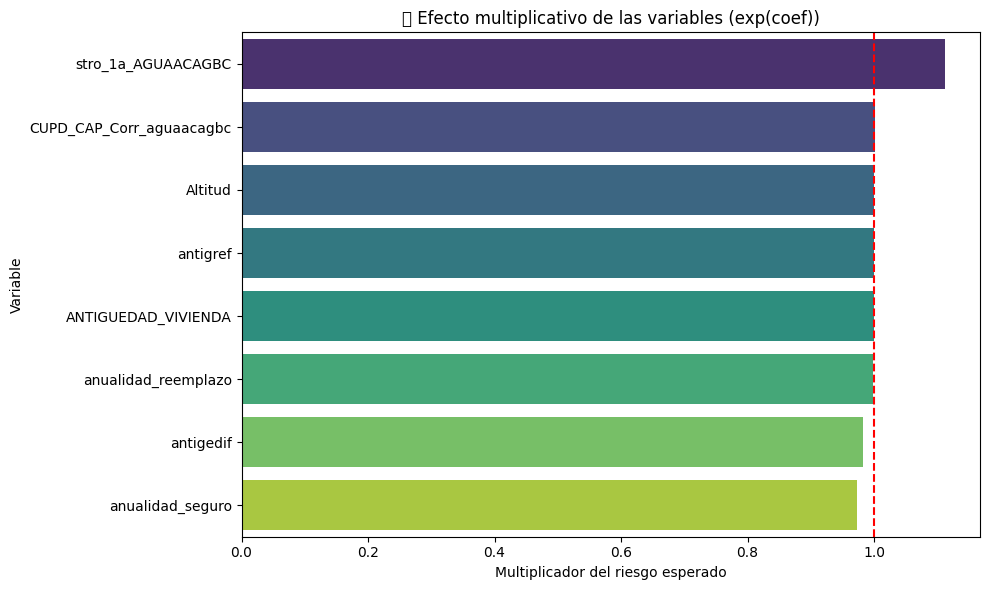

In [26]:
#GRAFICAER COEFICIENTES
# COEFICIENTES
coef_dict = {
    'Altitud': 0.0005,
    'antigedif': -0.0168,
    'antigref': -0.0006,
    'ANTIGUEDAD_VIVIENDA': -0.0006,
    'anualidad_reemplazo': -0.0023,
    'anualidad_seguro': -0.0267,
    'stro_1a_AGUAACAGBC': 0.1061,
    'CUPD_CAP_Corr_aguaacagbc': 0.0010
}

# Crear DataFrame
coef_df = pd.DataFrame({
    'Variable': coef_dict.keys(),
    'Coef': coef_dict.values()
})
coef_df['Exp(Coef)'] = np.exp(coef_df['Coef'])

# Ordenar
coef_df = coef_df.sort_values(by='Exp(Coef)', ascending=False)

# === PLOT ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Exp(Coef)', y='Variable', data=coef_df, palette='viridis')
plt.axvline(1, color='red', linestyle='--')
plt.title('📈 Efecto multiplicativo de las variables (exp(coef))')
plt.xlabel('Multiplicador del riesgo esperado')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


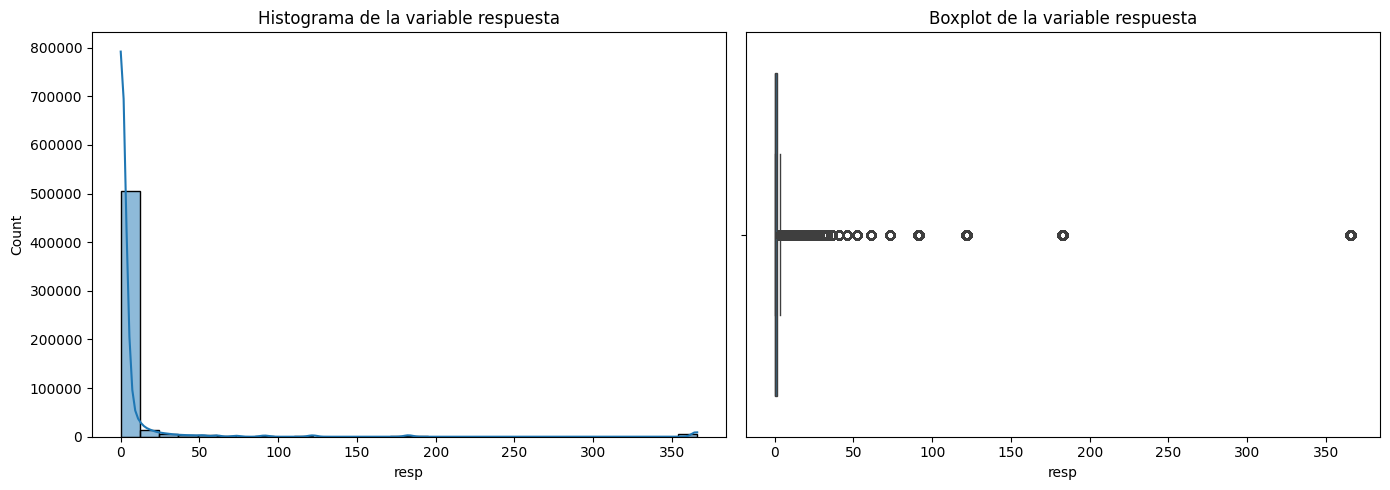

NameError: name 'glm_result' is not defined

In [37]:
# === Distribución de la variable de respuesta ===
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtrado['resp'], kde=True, bins=30)
plt.title('Histograma de la variable respuesta')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtrado['resp'])
plt.title('Boxplot de la variable respuesta')

plt.tight_layout()
plt.show()

# === Gráfico de coeficientes del modelo GLM ===
coefs = glm_result.params
errors = glm_result.bse

plt.figure(figsize=(8, len(coefs) * 0.4))
plt.barh(coefs.index, coefs.values, xerr=errors)
plt.title("Coeficientes del modelo GLM con errores estándar")
plt.xlabel("Valor del coeficiente")
plt.tight_layout()
plt.show()

# === Observado vs Predicho ===
df_filtrado['predicho'] = glm_result.predict(X)

plt.figure(figsize=(7, 7))
sns.scatterplot(x='resp', y='predicho', data=df_filtrado, alpha=0.6)
plt.plot([df_filtrado['resp'].min(), df_filtrado['resp'].max()],
         [df_filtrado['resp'].min(), df_filtrado['resp'].max()], 'r--')
plt.xlabel("Observado")
plt.ylabel("Predicho")
plt.title("Comparación Observado vs Predicho (GLM)")
plt.grid(True)
plt.show()


In [32]:
#LASSO
#Preparar datos
X = df_filtrado.drop(columns=['resp', 'exp_corr_ACAGBC', 'stro_Corr_AGUAACAGBC'], errors='ignore')
y = df_filtrado['resp']

# Asegurar que no haya valores 0 o negativos
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

# FILTER X AND y TOGETHER
mask = y > 0
y = y[mask]
X = X[mask]

# Imputar valores faltantes (NaN) con la media de cada columna
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_imputed = imputer.fit_transform(X) # Impute missing values in X

# Escalar variables (obligatorio para Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Scale the imputed data

# Transformar y si es necesario
y_log = np.log(y)

# Lasso con validación cruzada
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y_log)

# Importancia de variables
coef = pd.Series(lasso.coef_, index=X.columns)
coef_nonzero = coef[coef != 0].sort_values(key=abs, ascending=False)


In [33]:
print(coef_nonzero)

K_ACAGBC                                      0.31
stro_1a_AGUAACAGBC                            0.18
Temperatura_med_max_mes_calido                0.14
Temperatura_med_min_mes_frio                  0.14
Temperatura_med_anual                        -0.08
Altitud                                       0.06
anualidad_seguro                             -0.05
AnyoCons_edif                                 0.05
Duracion_per_calido                          -0.04
DIAS_VIENT_MAX_70KMH                         -0.04
year                                         -0.04
Elevation_AVG                                -0.04
DIAS_PREC_SUP_1MM                             0.03
nse                                           0.03
stro_5a_AGUAACAGBC                            0.03
stro_3a_AGUAACAGBC                            0.03
ANTIGUEDAD_VIVIENDA                           0.03
NIF_TIPO_N                                   -0.03
CODPROV                                       0.02
Etiq_AGUAACAGBC_Valores coheren

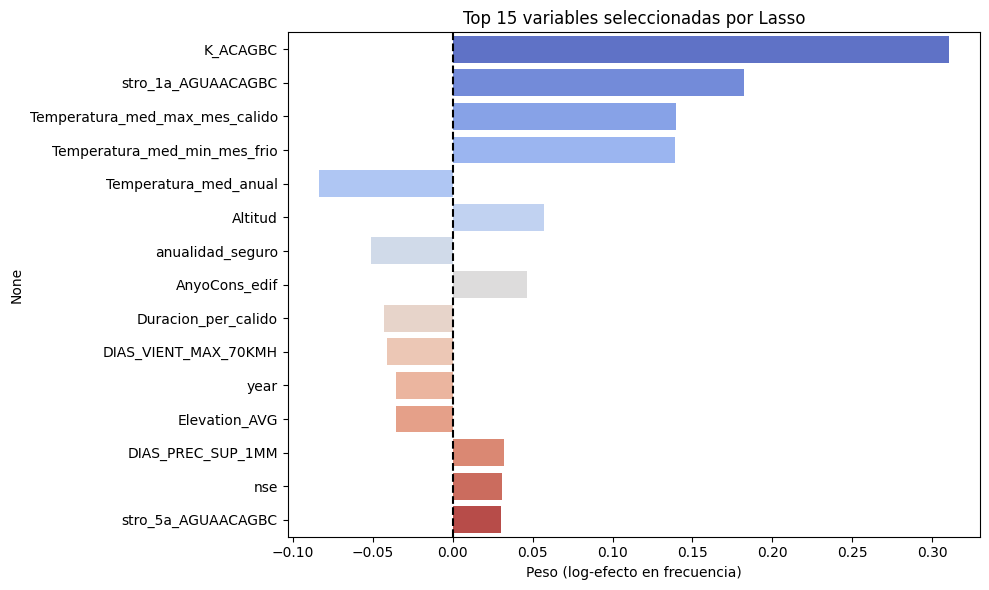

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_nonzero.head(15).values, y=coef_nonzero.head(15).index, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title('Top 15 variables seleccionadas por Lasso')
plt.xlabel('Peso (log-efecto en frecuencia)')
plt.tight_layout()
plt.show()


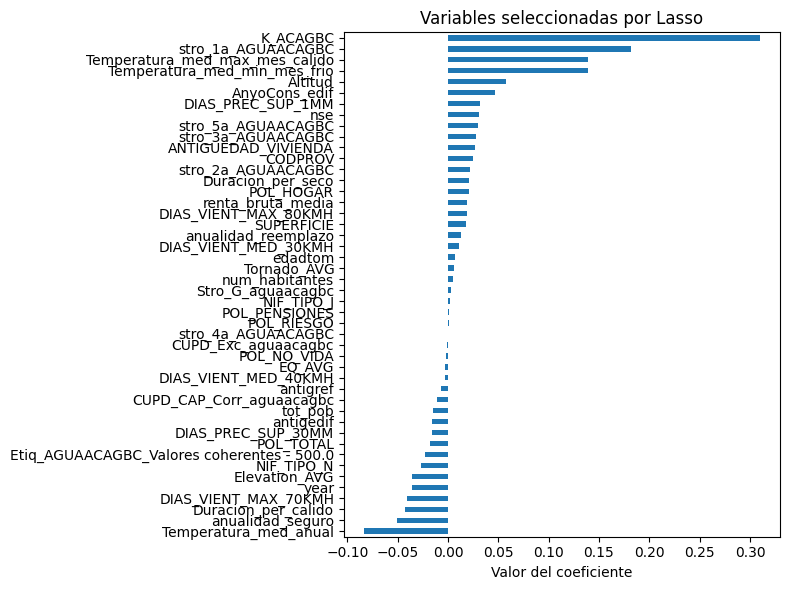

In [41]:
# Coeficientes diferentes de cero
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
nonzero_coefs = lasso_coefs[lasso_coefs != 0].sort_values()

plt.figure(figsize=(8, 6))
nonzero_coefs.plot(kind='barh')
plt.title('Variables seleccionadas por Lasso')
plt.xlabel('Valor del coeficiente')
plt.tight_layout()
plt.show()


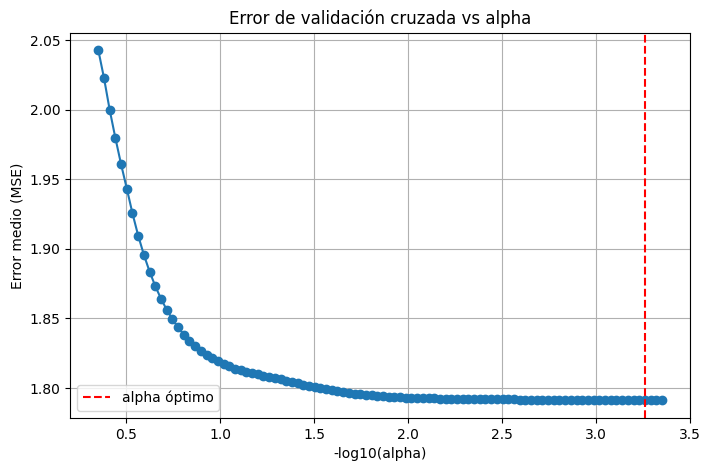

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(m_log_alphas, lasso.mse_path_.mean(axis=-1), marker='o')
plt.axvline(-np.log10(lasso.alpha_), linestyle='--', color='r', label='alpha óptimo')
plt.xlabel('-log10(alpha)')
plt.ylabel('Error medio (MSE)')
plt.title('Error de validación cruzada vs alpha')
plt.legend()
plt.grid(True)
plt.show()
